# <a id='шаг0'></a>A/B тестирование в интернет-магазине
*(убрал подробности в целях соблюдения авторских прав)*  
[Следующий шаг](#шаг1)

Допустим, я аналитик крупного интернет-магазина. Отдел маркетинга поручил мне:
- Приоритизировать гипотезы
- Провести A/B тестирование и выяснить, как повысить доход компании

В файле `datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# загрузка данных
hypothesis = pd.read_csv('datasets/hypothesis.csv', sep=',')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Как видим, в таблице записаны данные для приоритизации гипотез, шкала по каждому пункту от 0 до 10. Нам не важно точное значение того или иного числа, лишь их ранг сравнительно друг с другом.

Проблемы в данных:
- верхний регистр в названиях столбцов

Исправлю эти проблемы:

In [4]:
# приведение названия столбцов к нижнему регистру
pd.set_option('max_colwidth', 400)
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**Вывод**: данные предоставлены в корректном виде, привёл только названия столбцов к нижнему регистру в соответствии с синтаксисом языка Python.


# Часть 1. Приоритизация гипотез.<a id='шаг1'></a> 
[предыдущий шаг](#шаг0)  -- [следующий шаг](#шаг2)  

## Задача
- [Применю фреймворк ICE для приоритизации гипотез. Отсортирую их по убыванию приоритета](#шаг1.1)
- [Применю фреймворк RICE для приоритизации гипотез. Отсортирую их по убыванию приоритета](#шаг1.2)
- [Определю, как изменилась приоритизация гипотез при применении RICE вместо ICE](#шаг1.3)

### <a id='шаг1.1'></a> Применю фреймворк ICE для приоритизации гипотез. Отсортирую их по убыванию приоритета.

In [5]:
hypothesis['ICE'] = (hypothesis.impact * hypothesis.confidence / hypothesis.efforts).round(1)
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


### <a id='шаг1.2'></a> Применю фреймворк RICE для приоритизации гипотез. Отсортирую их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts).round(1)
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


### <a id='шаг1.3'></a> Определю, как изменилась приоритизация гипотез при применении RICE вместо ICE

Сравнение фреймворков графически

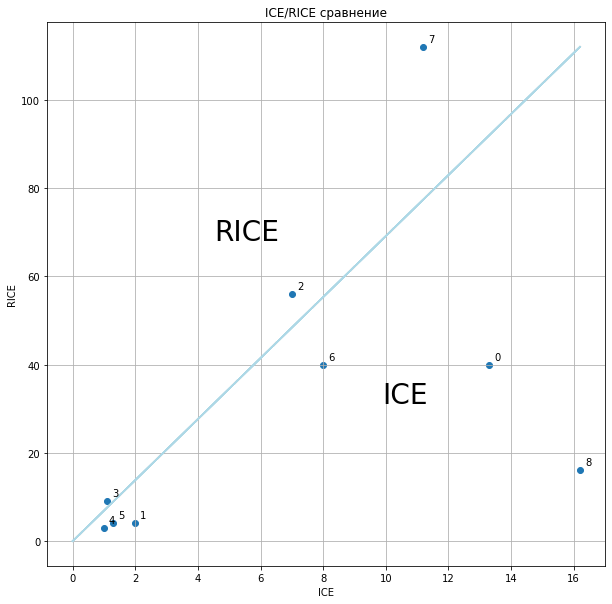

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
hypothesis = hypothesis.sort_index()
x = hypothesis.ICE.values
y = hypothesis.RICE.values
ax.scatter(x, y)

ax.set_xlabel('ICE')
ax.set_ylabel('RICE')
ax.set_title('ICE/RICE сравнение')
ax.annotate('ICE', [0.6, 0.3], fontsize=28, xycoords='axes fraction')
ax.annotate('RICE', [0.3, 0.6], fontsize=28, xycoords='axes fraction')
ax.grid()

for i, row in hypothesis.iterrows():
    ax.annotate(row.name, (x[i], y[i]), xytext=(5,5), textcoords='offset points')
    plt.plot([0,hypothesis.ICE.max()], [0,hypothesis.RICE.max()], color='lightblue')

**Вывод**: Фреймворк RICE учитывает охват пользователей, которых коснётся изменение в функционале. Поэтому в сравнении с ICE лидирующие гипотезы (скидка в день рождения и новые каналы привлечения трафика) с малым охватом потеряли своё лидерство. Гипотезы 1,3,4,5 являются аутсайдерами и для ICE, и для RICE, что хорошо видно на графике.

# Часть 2. Проведение анализа A/B-теста<a id='шаг2'></a> 
[предыдущий шаг](#шаг1) -- [следующий шаг](#шаг3)

Был проведен A/B тест, собраны данные о посещениях и покупках пользователей.

Данные разделены запятыми, загружу их в таблицы pandas:

In [8]:
orders = pd.read_csv('datasets/orders.csv')
visitors = pd.read_csv('datasets/visitors.csv')

Информация о таблице заказов:

In [9]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Информация о таблице посетителей:

In [10]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Вывод**: В таблице с заказами мы имеем отдельные записи по каждому заказу с указанием *группы теста, номера транзакции, дня, выручки за заказ и пользователя*.  
В таблице с пользователями: *количество пользователей* всего по дням.  

Обнаруженные проблемы:
- дата записана в виде строки
- в таблице заказов формат заголовков не в питоновском стиле

Исправлю эти проблемы:

##### Исправление дат:

In [11]:
orders.date = pd.to_datetime(orders.date)

In [12]:
visitors.date = pd.to_datetime(visitors.date)

##### Подготовка данных
Исправление названий столбцов:

In [13]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

Проверка уникальности значений в строках по заказам:

In [14]:
orders.duplicated(subset=['transaction_id']).sum()

0

##### Проверка на пользователей, нарушающих условия тестирования:

In [15]:
tt_visitors = (orders
              .groupby(['group', 'visitor_id'], as_index=False)
              .agg({'transaction_id': 'nunique'})
              .rename(columns={'transaction_id': 'transactions'}))
display(tt_visitors.head())
display(tt_visitors.tail())

,group,visitor_id,transactions
0,A,8300375,1
1,A,11685486,1
2,A,54447517,1
3,A,66685450,1
4,A,78758296,1


,group,visitor_id,transactions
1084,B,4258103007,1
1085,B,4266935830,1
1086,B,4279090005,1
1087,B,4281247801,1
1088,B,4283872382,1


In [16]:
tt_visitors_A = tt_visitors[tt_visitors.group == 'A'][['visitor_id', 'transactions']]
tt_visitors_B = tt_visitors[tt_visitors.group == 'B'][['visitor_id', 'transactions']]
visitors_crossing = tt_visitors_A.merge(tt_visitors_B, on='visitor_id', how='inner',
                                        suffixes=('_A', '_B'))
display(visitors_crossing.head())
print('Пользователей, нарушающих чистоту А/В тестирования:', visitors_crossing.shape[0])

,visitor_id,transactions_A,transactions_B
0,8300375,1,1
1,199603092,4,1
2,232979603,1,1
3,237748145,4,1
4,276558944,1,1


Пользователей, нарушающих чистоту А/В тестирования: 58


In [17]:
visitors_crossing['percent_A'] = visitors_crossing.transactions_A /\
(visitors_crossing.transactions_A + visitors_crossing.transactions_B) * 100
visitors_crossing.describe()

,visitor_id,transactions_A,transactions_B,percent_A
count,5.800000e+01,58.000000,58.000000,58.000000
mean,2.337492e+09,1.534483,1.586207,48.925897
std,1.330057e+09,1.259567,1.155224,12.963910
min,8.300375e+06,1.000000,1.000000,20.000000
25%,1.320569e+09,1.000000,1.000000,50.000000
50%,2.583608e+09,1.000000,1.000000,50.000000
75%,3.702373e+09,1.000000,2.000000,50.000000
max,4.266936e+09,7.000000,6.000000,80.000000


In [18]:
print('Процент аномальных пользователей: {:.1f}'.format(
    visitors_crossing.shape[0] / orders.visitor_id.nunique() * 100)
     )

Процент аномальных пользователей: 5.6


Чуть менее 6% пользователей нарушили условия эксперимента, придется их удалить, т.к. они вносят шум в результаты.

In [19]:
visitors_AB_wrong = visitors_crossing.visitor_id.tolist()

In [20]:
print('Заказов всего:', orders.transaction_id.nunique())
orders = orders[np.logical_not(orders.visitor_id.isin(visitors_AB_wrong))]
print('Корректных заказов:', orders.transaction_id.nunique())

Заказов всего: 1197
Корректных заказов: 1016


#### Таблицы после предобработки:

Таблица пользователей:

In [21]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Таблица заказов:

In [22]:
display(orders.head())
orders.info()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


**Вывод**: таблицы подготовлены для дальнейшего анализа.

## Анализ данных:

##### Таблица пользователей:

Анализ по датам:

In [23]:
visitors.date.describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [24]:
def plot_AB(A, B, ycol, title='', ylabel='', ls='-', ymin=None, ymax=None):
    """Отобразить график распределения для А/В теста
    ycol - колонка, для оси у
    """
    _, ax = plt.subplots(figsize=(10,7))
    plt.plot(A.date, A[ycol], ls, label='A')
    plt.plot(B.date, B[ycol], ls, label='B')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.xlabel('Дата')
    if np.logical_and(pd.notna(ymin), pd.notna(ymax)):
        plt.ylim((ymin, ymax))
    plt.grid()
    plt.legend()
    plt.show()

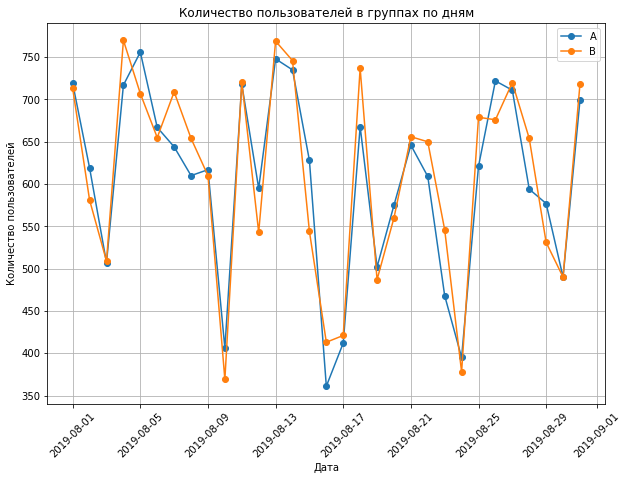

In [25]:
visitors_A = visitors[visitors.group == 'A']
visitors_B = visitors[visitors.group == 'B']
plot_AB(visitors_A, visitors_B, 'visitors', title='Количество пользователей в группах по дням',
        ylabel='Количество пользователей', ls='-o')

На графике видны недельные колебания количества пользователей в обеих группах.

In [26]:
visitors.group.value_counts()

B    31
A    31
Name: group, dtype: int64

##### Таблица с заказами:

In [27]:
orders_stat = (orders.groupby(['group', 'date']).agg({'transaction_id' :'nunique',
                                                      'visitor_id': 'nunique',
                                                      'revenue': 'sum'})
                .rename(columns={'transaction_id': 'orders',
                                 'visitor_id': 'visitors'})
                .reset_index())

In [28]:
orders_stat_A = orders_stat[orders_stat.group == 'A']
orders_stat_B = orders_stat[orders_stat.group == 'B']

Распределение по дням для orders


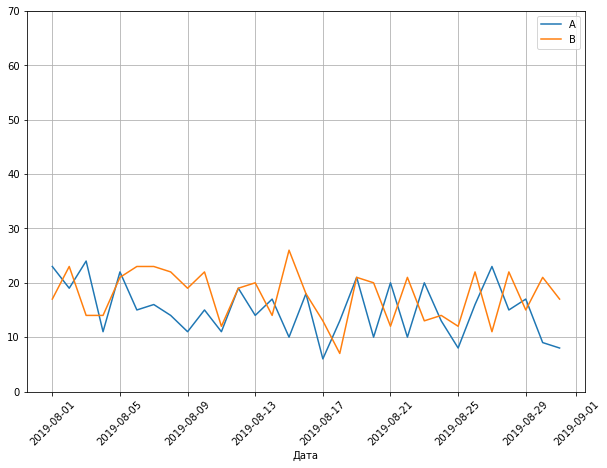

Распределение по дням для visitors


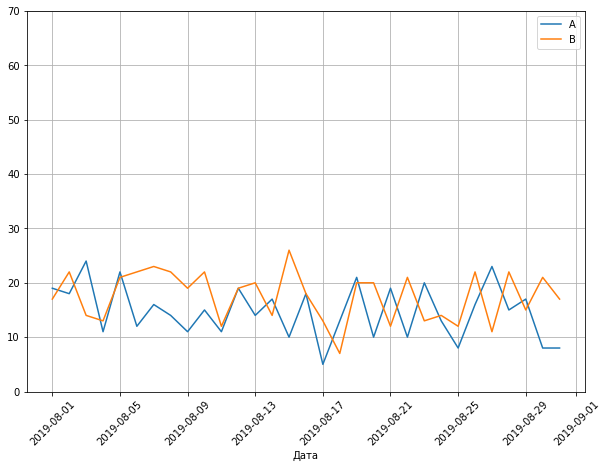

Распределение по дням для revenue


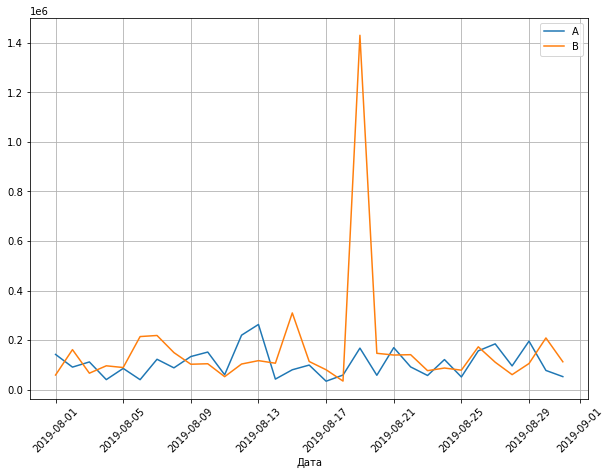

In [29]:
ylim_dict={'orders': {'min': 0, 'max': 70},
          'visitors': {'min': 0, 'max': 70}}
for col in ['orders', 'visitors', 'revenue']:
#     установка границ для графиков
    try:
        ymin = ylim_dict[col]['min']
        ymax = ylim_dict[col]['max']
    except:
        ymin = None
        ymax = None
    print('Распределение по дням для', col)
    plot_AB(orders_stat_A, orders_stat_B, ycol=col, ymin=ymin, ymax=ymax)

**Вывод**: мне для анализа предоставлены 2 группы пользователей и данные об их посещениях по дням и покупках. Интервал дат для анализа - весь август 2019. Предварительный анализ данных позволил выявить выбросы в виде крупных покупок, необходимо их отфильтровать, прежде чем сравнивать группы.

Подготовка данных для А/В тестирования:

In [30]:
def get_data(visitors, orders):
# агрегация обычных и кумулятивных данных
    visitors_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
    visitors_a_daily.columns = ['date', 'visitors_per_date_a']

    visitors_a_cumulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg({'date' : 'max', 'visitors_per_date_a' : 'sum'}), axis=1)
    visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']

    visitors_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
    visitors_b_daily.columns = ['date', 'visitors_per_date_b']

    visitors_b_cumulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg({'date' : 'max', 'visitors_per_date_b' : 'sum'}), axis=1)
    visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']

    orders_a_daily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
        .groupby('date', as_index=False)\
        .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
    orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

    orders_a_cumulative = orders_a_daily.apply(
        lambda x: \
            orders_a_daily[orders_a_daily['date'] <= x['date']]\
                .agg({
                    'date' : 'max',
                    'orders_per_date_a' : 'sum',
                    'revenue_per_date_a' : 'sum'}), axis=1).sort_values(by=['date'])
    orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']

    orders_b_daily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
        .groupby('date', as_index=False)\
        .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
    orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

    orders_b_cumulative = orders_b_daily.apply(
        lambda x: \
            orders_b_daily[orders_b_daily['date'] <= x['date']]\
                .agg({
                    'date' : 'max',
                    'orders_per_date_b' : 'sum',
                    'revenue_per_date_b' : 'sum'}), axis=1).sort_values(by=['date'])
    orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']

    data = orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')\
        .merge(orders_a_cumulative, left_on='date', right_on='date', how='left')\
        .merge(orders_b_cumulative, left_on='date', right_on='date', how='left')\
        .merge(visitors_a_daily, left_on='date', right_on='date', how='left')\
        .merge(visitors_b_daily, left_on='date', right_on='date', how='left')\
        .merge(visitors_a_cumulative, left_on='date', right_on='date', how='left')\
        .merge(visitors_b_cumulative, left_on='date', right_on='date', how='left')
    data.head()
    return data

In [31]:
data = get_data(visitors, orders)

## Задача
Проанализируйте A/B-тест:
- [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#шаг2.1)
- [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#шаг2.2)
- [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#шаг2.3)
- [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#шаг2.4)
- [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#шаг2.5)
- [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#шаг2.6)
- [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#шаг2.7)
- [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#шаг2.8)
- [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#шаг2.9)
- [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#шаг2.10)
- [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#шаг2.11)
- [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#шаг2.12)
- [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#шаг2.13)
- [Примите решение по результатам теста и объясните его.](#шаг2.14)

#### <a id='шаг2.1'></a> Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [32]:
def get_cumulative_data_AB(data):
    cumulative_A = data[['date', 
                         'revenue_cumulative_a',
                         'orders_cumulative_a',
                        'visitors_cumulative_a']].rename(columns={'revenue_cumulative_a': 'revenue_cumulative',
                                                                  'orders_cumulative_a': 'orders_cumulative',
                                                                 'visitors_cumulative_a': 'visitors_cumulative'})
    cumulative_B = data[['date', 
                         'revenue_cumulative_b',
                         'orders_cumulative_b',
                         'visitors_cumulative_b'
                        ]].rename(columns={'revenue_cumulative_b': 'revenue_cumulative',
                                           'orders_cumulative_b': 'orders_cumulative',
                                          'visitors_cumulative_b': 'visitors_cumulative'})
    cumulative_A['mean_check_cumulative'] = cumulative_A.revenue_cumulative / cumulative_A.orders_cumulative
    cumulative_B['mean_check_cumulative'] = cumulative_B.revenue_cumulative / cumulative_B.orders_cumulative
    cumulative_A['conversion_cumulative'] = cumulative_A.orders_cumulative / cumulative_A.visitors_cumulative
    cumulative_B['conversion_cumulative'] = cumulative_B.orders_cumulative / cumulative_B.visitors_cumulative
    print('Первые строки таблицы накопительных данных группы А')
    display(cumulative_A.head())
    print('Первые строки таблицы накопительных данных группы В')
    display(cumulative_B.head())
    return cumulative_A, cumulative_B

In [33]:
cumulative_A, cumulative_B = get_cumulative_data_AB(data)

Первые строки таблицы накопительных данных группы А


,date,revenue_cumulative,orders_cumulative,visitors_cumulative,mean_check_cumulative,conversion_cumulative
0,2019-08-01,142779,23,719,6207.782609,0.031989
1,2019-08-02,234381,42,1338,5580.500000,0.031390
2,2019-08-03,346854,66,1845,5255.363636,0.035772
3,2019-08-04,388030,77,2562,5039.350649,0.030055
4,2019-08-05,474413,99,3318,4792.050505,0.029837


Первые строки таблицы накопительных данных группы В


,date,revenue_cumulative,orders_cumulative,visitors_cumulative,mean_check_cumulative,conversion_cumulative
0,2019-08-01,59758,17,713,3515.176471,0.023843
1,2019-08-02,221801,40,1294,5545.025000,0.030912
2,2019-08-03,288850,54,1803,5349.074074,0.029950
3,2019-08-04,385740,68,2573,5672.647059,0.026428
4,2019-08-05,475648,89,3280,5344.359551,0.027134


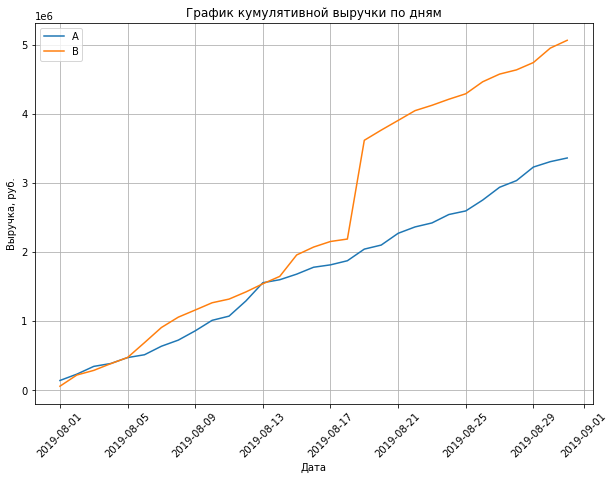

In [34]:
plot_AB(cumulative_A, cumulative_B, 'revenue_cumulative', title='График кумулятивной выручки по дням',
       ylabel='Выручка, руб.')

**Вывод:** группа В до 17 августа 2019 была не хуже группы А, в отдельные дни даже лучше, а после этого за счёт большого выброса вышла в лидеры.

#### <a id='шаг2.2'></a>Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

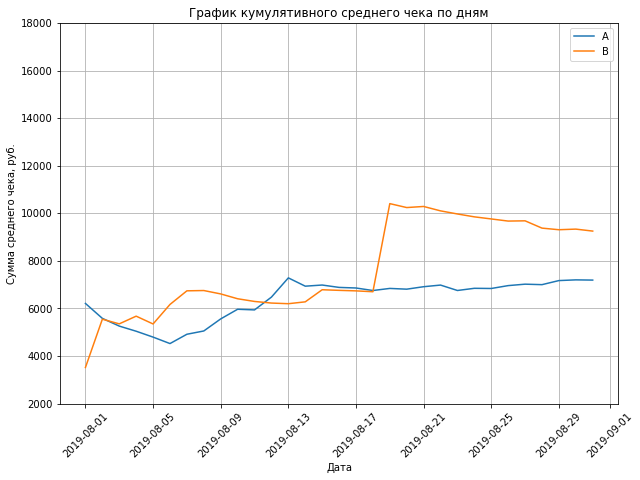

In [35]:
plot_AB(cumulative_A, cumulative_B, 'mean_check_cumulative', title='График кумулятивного среднего чека по дням',
       ylabel='Сумма среднего чека, руб.', ymin=2000, ymax=18000)

**Вывод**: налицо выброс от 18 августа, за счёт чего группа В вышла вперёд. На основании только этого графика и "сырых" данных выводы делать преждевременно, нужна фильтрация аномалий.

#### <a id='шаг2.3'></a>Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [36]:
def get_rel_col(A, B, col):
    both = A[['date', col]].merge(B[['date', col]],
                                                                 on='date', how='outer',
                                                                 suffixes=('_A', '_B'))
    print('Проверка на пропуски после соединения таблиц:')
    display(both.isnull().sum())
    rel_col_name = 'rel_' + col
    col_A = col + '_A'
    col_B = col + '_B'
    both[rel_col_name] = both[col_B] / both[col_A] - 1
    display(both.head())
    return both

In [37]:
cumulative_both_mean_check = get_rel_col(cumulative_A, cumulative_B, 'mean_check_cumulative')

Проверка на пропуски после соединения таблиц:


date                       0
mean_check_cumulative_A    0
mean_check_cumulative_B    0
dtype: int64

,date,mean_check_cumulative_A,mean_check_cumulative_B,rel_mean_check_cumulative
0,2019-08-01,6207.782609,3515.176471,-0.433747
1,2019-08-02,5580.500000,5545.025000,-0.006357
2,2019-08-03,5255.363636,5349.074074,0.017831
3,2019-08-04,5039.350649,5672.647059,0.125670
4,2019-08-05,4792.050505,5344.359551,0.115255


In [38]:
def plot_rel_AB(AB, col, title='', ylabel='', second_hline=None, second_AB=None):
    _, ax = plt.subplots(figsize=(10, 7))
    l1, = plt.plot(AB['date'], AB[col])
    plt.axhline(0, ls='--', color='black')
    if type(second_AB) == pd.DataFrame:
        l2, = plt.plot(second_AB['date'], second_AB[col], ls='--')
        plt.legend(handles=(l1, l2), labels=('Отфильтрованные данные', 'Исходные данные'))
    if pd.notna(second_hline):
        plt.axhline(second_hline, ls='--', linewidth=1, color='black')

    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

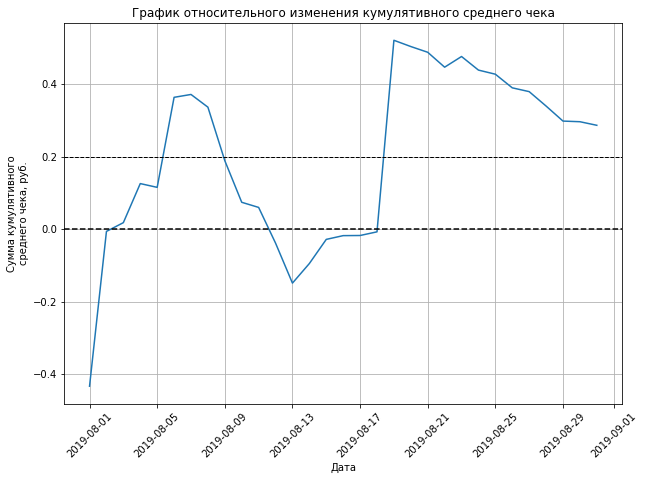

In [39]:
plot_rel_AB(cumulative_both_mean_check, 'rel_mean_check_cumulative',
            title='График относительного изменения кумулятивного среднего чека',
            ylabel='Сумма кумулятивного\nсреднего чека, руб.', second_hline=0.2)

**Вывод**: График показывает нестабильную тенденцию, к выигрышу группы В по среднему чеку, однако похоже, что это связано с отдельными выбросами. Стоит провести предварительную фильтрацию, без фильтрации выбросов можно придти к неверным выводам.

#### <a id='шаг2.4'></a>Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

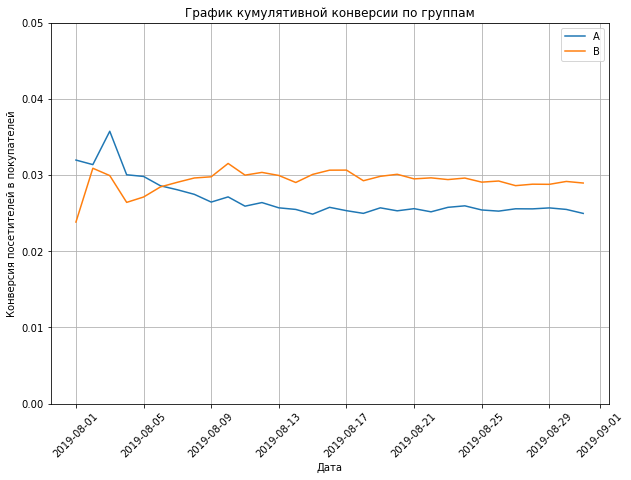

In [40]:
plot_AB(cumulative_A, cumulative_B, 'conversion_cumulative', title='График кумулятивной конверсии по группам',
       ylabel='Конверсия посетителей в покупателей', ymin=0, ymax=0.05)

**Вывод**: видно, что накопительная конверсия установилась где-то 9 августа 2019, и с тех пор группа В устойчиво превосходит по этому показателю контрольную группу А.

#### <a id='шаг2.5'></a>Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [41]:
cumulative_both_conv = get_rel_col(cumulative_A, cumulative_B, 'conversion_cumulative')

Проверка на пропуски после соединения таблиц:


date                       0
conversion_cumulative_A    0
conversion_cumulative_B    0
dtype: int64

,date,conversion_cumulative_A,conversion_cumulative_B,rel_conversion_cumulative
0,2019-08-01,0.031989,0.023843,-0.254650
1,2019-08-02,0.031390,0.030912,-0.015235
2,2019-08-03,0.035772,0.029950,-0.162759
3,2019-08-04,0.030055,0.026428,-0.120659
4,2019-08-05,0.029837,0.027134,-0.090595


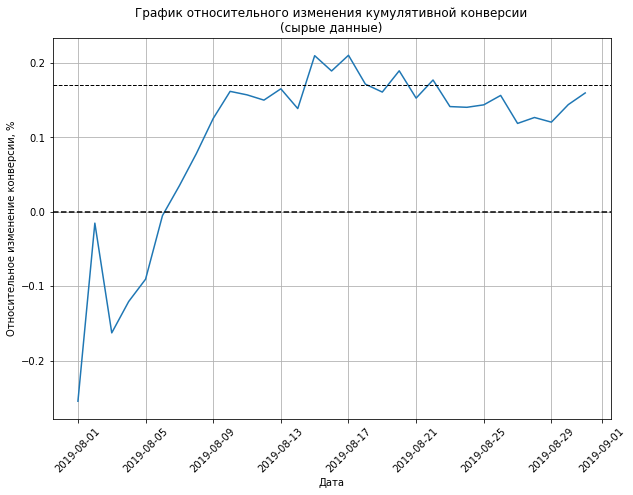

In [42]:
plot_rel_AB(cumulative_both_conv, 'rel_conversion_cumulative', title='График относительного изменения кумулятивной конверсии\n(сырые данные)',
           ylabel='Относительное изменение конверсии, %', second_hline=0.17)

**Вывод**: начиная с 9-го августа относительная конверсия колеблется на уровне 17% в сторону преимущества группы В.

#### <a id='шаг2.6'></a>Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

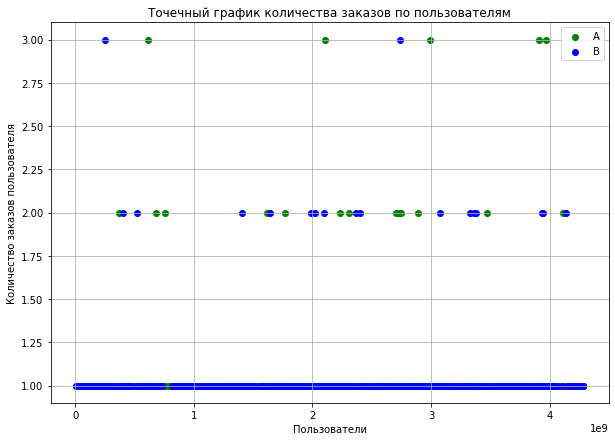

In [43]:
_, ax = plt.subplots(figsize=(10,7))
visitors_orders_num_A = orders[orders.group=='A'].groupby('visitor_id')['transaction_id'].nunique()
plt.scatter(visitors_orders_num_A.index, visitors_orders_num_A, color='green', label='A')
visitors_orders_num_B = orders[orders.group=='B'].groupby('visitor_id')['transaction_id'].nunique()
plt.scatter(visitors_orders_num_B.index, visitors_orders_num_B, color='blue', label='B')
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов пользователя')
plt.xlabel('Пользователи')
plt.legend()
plt.grid()
plt.show()

**Вывод**: Похоже, что выбросов нет, есть более и менее активные клиенты. 3 покупки за месяц не выглядят чем-то аномальным. Фильтровать данные по этому параметру даже вредно, можем лишиться в анализе более платежеспособных или лояльных клиентов.

#### <a id='шаг2.7'></a>Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [44]:
visitors_orders_num = orders.groupby('visitor_id')['transaction_id'].nunique()
# распределение по количеству заказов
visitors_orders_num.value_counts()

1    937
2     29
3      7
Name: transaction_id, dtype: int64

In [45]:
# процентили
visitors_orders_num.quantile(q=[.9,.95,.99])

0.90    1.0
0.95    1.0
0.99    2.0
Name: transaction_id, dtype: float64

**Вывод:** более 3 заказов на пользователя не встречается. Смысла фильтровать данные нет.

#### <a id='шаг2.8'></a>Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

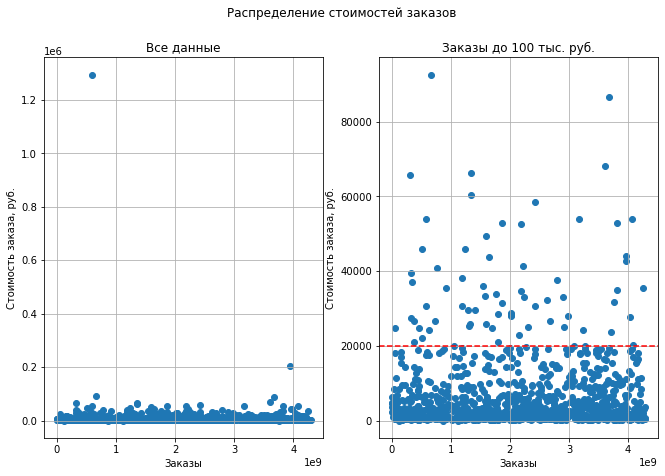

In [46]:
_, ax = plt.subplots(figsize=(11,7))
plt.subplot(1,2,1)
plt.scatter(orders.transaction_id, orders.revenue)
plt.title('Все данные')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа, руб.')
plt.grid()

plt.subplot(1,2,2)
orders_filtered = orders[orders.revenue <= 100_000]
plt.scatter(orders_filtered.transaction_id, orders_filtered.revenue)
plt.axhline(20_000, color='red', ls='--')
plt.title('Заказы до 100 тыс. руб.')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа, руб.')
plt.suptitle('Распределение стоимостей заказов')
plt.grid()
plt.show()

**Вывод**: есть аномально большой заказ стоимостью более 1_200_000 руб и чуть поменьше стоимостью 200_000 - это явные выбросы. На графике без учета этих заказов видно, что наиболее распространены заказы суммой приблизительно до 20 тыс. руб.

#### <a id='шаг2.9'></a>Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Посчитаю более точно процентили по заказам.

In [47]:
orders.revenue.quantile(q=[.9,0.95,0.99])

0.90    17990.0
0.95    26785.0
0.99    53904.0
Name: revenue, dtype: float64

Выберу все данные больше 50 тыс. за аномальные. Тем самым отфильтруется от 1 до 5% заказов.

#### <a id='шаг2.10'></a>Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулирую гипотезы:
- Н0: различий в конверсии между группами А и В нет
- Н1: различия в конверсии есть

Alpha - стандартно, 5%.

In [48]:
# отличия в количестве заказов по пользователям (сырые данные)
orders_by_users_a = (orders[orders['group']=='A']
                    .groupby('visitor_id', as_index=False)
                    .agg({'transaction_id' : pd.Series.nunique}))
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (orders[orders['group']=='B']
                    .groupby('visitor_id', as_index=False)
                    .agg({'transaction_id' : pd.Series.nunique}))
orders_by_users_b.columns = ['visitor_id', 'orders']

sample_a = (pd.concat([orders_by_users_a['orders'],
                       pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -\
                                                    len(orders_by_users_a['orders'])),
                                 name='orders')],axis=0))

sample_b = (pd.concat([orders_by_users_b['orders'],
                       pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -\
                                                    len(orders_by_users_b['orders'])),
                                 name='orders')],
                      axis=0))

print("p-value: {0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительная конверсия В/А: {0:.3f}".format(sample_b.mean()/sample_a.mean()-1)) 

p-value: 0.006
Относительная конверсия В/А: 0.160


**Вывод**: конверсия в группе В в среднем больше на 16%, и результат статистически значим, т.к. p-value значительно меньше alpha.

#### <a id='шаг2.11'></a>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Как было видно из точечных графиков, в сырых данных имеются выбросы, вследствие чего распределения исходных данных далеки от нормальных, поэтому для определения статистической значимости использую непараметрический тест, устойчивый к ним - Манна-Уитни.  
За нулевую гипотезу принимаю, что выборки взяты из одной генеральной совокупности, за первую - из разных.  
alpha принимаю за 5%.

Относительные различия в среднем чеке между группами (сырые данные)

In [49]:
print("p-value: {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительная величина различий средних чеков, В/А: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.415
Относительная величина различий средних чеков, В/А: 0.287


**Вывод**: несмотря на то, что средний чек в группе В в среднем больше на 25%, чем в группе А, по "сырым" данным статистически значимых различий не выявлено.

#### <a id='шаг2.12'></a>Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

##### Фильтрация исходных данных

In [50]:
visitors_abnormal_tt = orders.groupby(['group', 'visitor_id'])['transaction_id'].nunique().reset_index()
visitors_abnormal = visitors_abnormal_tt[visitors_abnormal_tt.transaction_id > 2]
visitors_abnormal_tt2 = orders[orders.revenue > 50_000]['visitor_id']
visitors_abnormal = pd.concat([pd.Series(visitors_abnormal.visitor_id), pd.Series(visitors_abnormal_tt2.values)], axis=0).drop_duplicates().reset_index(drop=True)
print('Всего пользователей с аномальным поведением:', len(visitors_abnormal))

Всего пользователей с аномальным поведением: 22


In [51]:
data_filtered = get_data(visitors, orders[np.logical_not(orders.visitor_id.isin(visitors_abnormal))])

In [52]:
cumulative_A_f, cumulative_B_f = get_cumulative_data_AB(data_filtered)

Первые строки таблицы накопительных данных группы А


,date,revenue_cumulative,orders_cumulative,visitors_cumulative,mean_check_cumulative,conversion_cumulative
0,2019-08-01,112340,18,719,6241.111111,0.025035
1,2019-08-02,202252,36,1338,5618.111111,0.026906
2,2019-08-03,314725,60,1845,5245.416667,0.032520
3,2019-08-04,355901,71,2562,5012.690141,0.027713
4,2019-08-05,442284,93,3318,4755.741935,0.028029


Первые строки таблицы накопительных данных группы В


,date,revenue_cumulative,orders_cumulative,visitors_cumulative,mean_check_cumulative,conversion_cumulative
0,2019-08-01,59758,17,713,3515.176471,0.023843
1,2019-08-02,221801,40,1294,5545.025000,0.030912
2,2019-08-03,288850,54,1803,5349.074074,0.029950
3,2019-08-04,385740,68,2573,5672.647059,0.026428
4,2019-08-05,475648,89,3280,5344.359551,0.027134


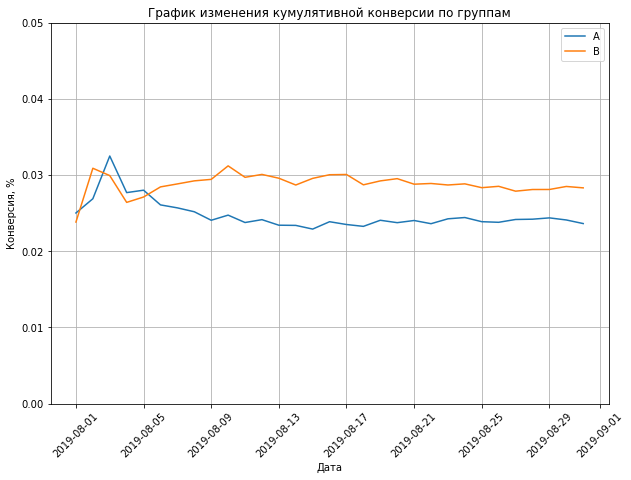

In [53]:
plot_AB(cumulative_A_f, cumulative_B_f, 'conversion_cumulative', title='График изменения кумулятивной конверсии по группам',
   ylabel='Конверсия, %', ymin=0, ymax=0.05)

**Вывод**: накопительная конверсия установилась где-то 9 августа 2019, и с тех пор группа В устойчиво превосходит по этому показателю А.

#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [54]:
cumulative_both_conv_f = get_rel_col(cumulative_A_f, cumulative_B_f, 'conversion_cumulative')

Проверка на пропуски после соединения таблиц:


date                       0
conversion_cumulative_A    0
conversion_cumulative_B    0
dtype: int64

,date,conversion_cumulative_A,conversion_cumulative_B,rel_conversion_cumulative
0,2019-08-01,0.025035,0.023843,-0.047608
1,2019-08-02,0.026906,0.030912,0.148892
2,2019-08-03,0.032520,0.029950,-0.079035
3,2019-08-04,0.027713,0.026428,-0.046348
4,2019-08-05,0.028029,0.027134,-0.031924


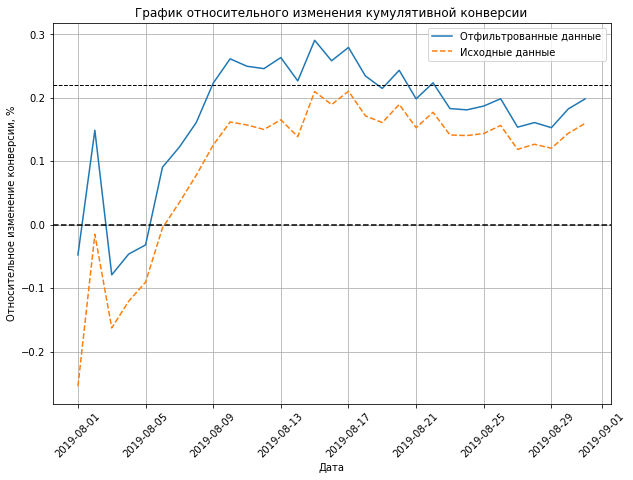

In [55]:
plot_rel_AB(cumulative_both_conv_f, 'rel_conversion_cumulative', 
        title='График относительного изменения кумулятивной конверсии',
       ylabel='Относительное изменение конверсии, %', second_hline=0.22, second_AB=cumulative_both_conv)

In [56]:
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(visitors_abnormal))]['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),name='orders')],axis=0)
sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(visitors_abnormal))]['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),name='orders')],axis=0)

Для сравнения параметров применю так же тест Манна-Уитни, проверю гипотезы:
- Н0 - данные взяты из одной генеральной совокупности, различий нет.
- Н1 - данные взяты из разных генеральных совокупностей.  

Alpha стандартно 5%.

In [57]:
print("p-value для конверсии пользователей: {0:.3f}".format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print("Относительная конверсия В/А: {0:.3f}".format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

p-value для конверсии пользователей: 0.003
Относительная конверсия В/А: 0.198


**Вывод**: вероятность ошибки 1 рода на очищенных данных по конверсии в 2 раза ниже, а относительная конверсия - выше. Подтверждаются выводы, полученные на сырых данных. Кроме того, была получена конверсия на 3% пункта больше, чем на "сырых" данных.

#### <a id='шаг2.13'></a>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

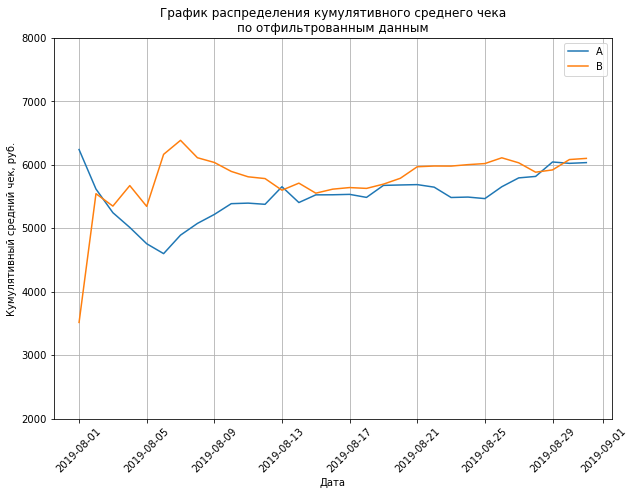

In [58]:
plot_AB(cumulative_A_f, cumulative_B_f, 'mean_check_cumulative',
        title='График распределения кумулятивного среднего чека\nпо отфильтрованным данным', 
        ylabel='Кумулятивный средний чек, руб.', ymin=2000, ymax=8000)

In [59]:
cumulative_both_mean_check_f = get_rel_col(cumulative_A_f, cumulative_B_f, 'mean_check_cumulative')

Проверка на пропуски после соединения таблиц:


date                       0
mean_check_cumulative_A    0
mean_check_cumulative_B    0
dtype: int64

,date,mean_check_cumulative_A,mean_check_cumulative_B,rel_mean_check_cumulative
0,2019-08-01,6241.111111,3515.176471,-0.436771
1,2019-08-02,5618.111111,5545.025000,-0.013009
2,2019-08-03,5245.416667,5349.074074,0.019762
3,2019-08-04,5012.690141,5672.647059,0.131657
4,2019-08-05,4755.741935,5344.359551,0.123770


Рассмотрю сравнение по средним чекам на очищенных данных.
Приму за нулевую гипотезу, что статистически значимых отличий нет. alpha = 5%.
Альтернативная гипотеза - различия есть.

In [60]:
print("p-value для очищенных данных по среднему чеку: {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(visitors_abnormal)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(visitors_abnormal)))]['revenue'])[1]))

print("Соотношение по средним чекам в группах, В/А: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(visitors_abnormal)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(visitors_abnormal)))]['revenue'].mean() - 1))

p-value для очищенных данных по среднему чеку: 0.469
Соотношение по средним чекам в группах, В/А: 0.011


**Вывод**: не отвергаю нулевую гипотезу, скорее всего, статистически значимых различий по среднему чеку в группах нет.

##### Сравнительные графики

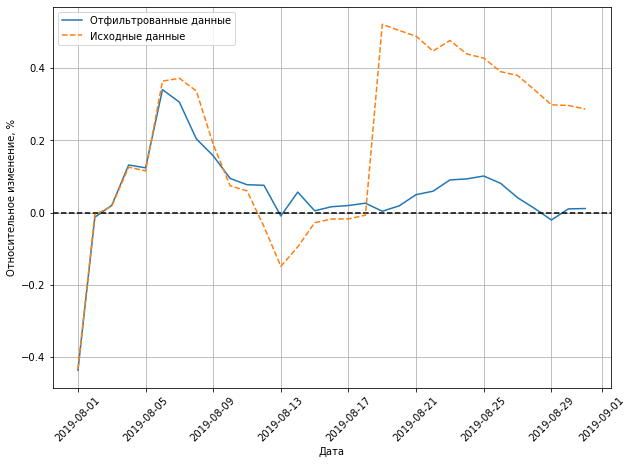

In [61]:
plot_rel_AB(cumulative_both_mean_check_f,
            'rel_mean_check_cumulative',
            ylabel='Относительное изменение, %',
           second_AB=cumulative_both_mean_check)

**Вывод**: после фильтрации аномальных значений средний чек в группах стал практически не отличаться, и по сырым данным различия более чем в 25% были ложными, за счёт аномальных заказов (разница хорошо видна на графике относительного изменения). Критерий Манна-Уитни позволил не допустить ошибку 2 рода (ложное принятие гипотезы об отсутствии отличий) даже на сырых данных, а на очищенных укрепился в своей позиции.

# Выводы<a id='шаг3'></a>  
[Предыдущий шаг](#шаг2)

### 1 часть (приоритизация гипотез)

Данные предоставлены в корректном виде, привёл только названия столбцов к нижнему регистру в соответствии с синтаксисом языка Python.

Фреймворк RICE учитывает охват пользователей, которых коснётся изменение в функционале. Поэтому в сравнении с ICE лидирующие гипотезы (скидка в день рождения и новые каналы привлечения трафика) с малым охватом потеряли своё лидерство.

### 2 часть (А/В тестирование)

Мне для анализа предоставлены 2 группы пользователей и данные об их посещениях по дням и покупках. Интервал дат для анализа - весь август 2019. Предварительный анализ данных позволил выявить выбросы в виде крупных покупок.

В процессе А/В тестирования сравнивались: *кумулятивный средний чек* и *кумулятивная конверсия посетителей в покупателей*.

Были рассмотрены 2 вида графиков - сравнительный по группам и определяющий относительные значения. Первый вид графиков позволяет увидеть и сравнить абсолютные значения сравниваемых метрик. Второй позволяет отобразить ситуацию более наглядно, в процентном соотношении по расхождению данных. Так же по нему легче отслеживать стабильность результатов.

#### Фильтрация аномальных данных
Используя точечные графики для количества заказов по пользователям, я определил, что пользователей с более чем 3 заказами нет (после предварительной фильтрации). Поэтому считаю, что выбросов нет, есть более и менее активные клиенты. 3 покупки за месяц не выглядят чем-то аномальным. Фильтровать данные по этому параметру даже вредно, можем исключить из анализа более платежеспособных или лояльных клиентов.

По заказам, напротив, такие данные есть. Принял за аномальные - заказы на сумму более 50 тыс. руб. Тем самым фильтруется от 1 до 5% заказов.

#### Кумулятивный средний чек
Без фильтрации видны большие выбросы, что не позволяет провести достоверное сравнение. Статистическая проверка с помощью метода, нечувствительного к выборсам - Манна-Уитни - это подтверждает, при более 25% различий между группами в пользу группы В статистически значимых различий не выявлено.

После фильтрации аномальных значений средний чек в группах стал практически не отличаться, и стало ясно, что различия более чем в 25% в сырых данных были ложными, за счёт аномальных заказов (разница хорошо видна на графике относительного изменения). Начиная с 12 августа, данные в группах различаются слабо, группа В периодически выходит в лидеры, однако без статистически значимых различий. 
Критерий Манна-Уитни позволил не допустить ошибку 2 рода (ложное принятие гипотезы об отсутствии отличий) даже на сырых данных, что подтверждает предпочтительность его применения при наличии выбросов.

#### Кумулятивная конверсия
Видно, что накопительная конверсия установилась где-то 9 августа 2019, и с тех пор группа В устойчиво превосходит по этому показателю контрольную группу А (разница около 17%). Тест Манна-Уитни показал стат. значимость различий даже на сырых данных.

Вероятность ошибки 1 рода (вероятность ложного принятия гипотезы о том, что стат. значимые отличия имеются) на очищенных данных по сраврению с "сырыми" по конверсии в 2 раза ниже, а относительная конверсия - выше. Подтверждаются выводы, полученные на сырых данных. Кроме того, была получена конверсия на 3% пункта больше, чем на "сырых" данных.

#### Решение по результатам теста:  
Тест ***признаю успешным*** за счёт достижения устойчивого и ***статистически значимого*** повышения **конверсии** посетителей в покупателей при сохранении среднего чека, что достоверно свидетельствует об увеличении выручки.